In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from torch_geometric.datasets import ZINC

In [3]:
from graph_to_mol import ZINC_Graph_Add_Mol

In [4]:
data = ZINC("/tmp/ZINC_mol", subset = True, pre_transform= ZINC_Graph_Add_Mol())

/nfs/homedirs/kempern/anaconda3/envs/substructureML2/lib/python3.8/site-packages/torch_geometric/data/dataset.py:150: UserWarning: The `pre_transform` argument differs from the one used in the pre-processed version of this dataset. If you want to make use of another pre-processing technique, make sure to delete '/tmp/ZINC_mol/subset/processed' first
  warnings.warn(


In [5]:
%cd ..

/nfs/homedirs/kempern/substructure-gnns


In [6]:
import datasets.fragmentations.fragmentations as frag

In [7]:
from tqdm import tqdm
vocab_constructor = frag.MagnetVocab(max_vocab_size = 100)
for d in tqdm(data):
    vocab_constructor(d)
vocab = vocab_constructor.get_vocab()

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [09:36<00:00, 17.35it/s]


In [19]:
vocab_constructor_brics = frag.BRICSVocab(max_vocab_size = 100)
for d in data:
    vocab_constructor_brics(d)
vocab_brics = vocab_constructor_brics.get_vocab()

In [20]:
vocab_constructor_psm = frag.PrincipalSubgraphVocab(max_vocab_size=100, vocab_path= "/tmp/psm_vocab")
for d in data:
    vocab_constructor_psm(d)
vocab_psm = vocab_constructor_psm.get_vocab()

100%|██████████| 10000/10000 [00:07<00:00, 1323.67it/s]


INFO::Added 10 atoms, 90 principal subgraphs to extract


100%|██████████| 90/90 [08:16<00:00,  5.52s/it]

INFO::sorting vocab by atom num


In [8]:
magnet = frag.Magnet(vocab)
substructures = frag.FragmentRepresentation(vocab_size=100)
substructures(magnet(data[0])).fragments_edge_index

tensor([[ 0,  1,  2,  2,  3,  4,  5,  6,  7,  8,  9, 10, 10, 11, 12, 12, 13, 14,
         15, 15, 16, 17, 18, 19, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
        [ 0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  1,  3,  3,  3,  4,  4,  4,
          4,  5,  5,  5,  5,  5,  6,  6,  6,  2,  6,  6,  4,  4,  1,  1]])

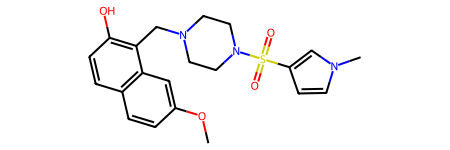

In [14]:
data[0].mol

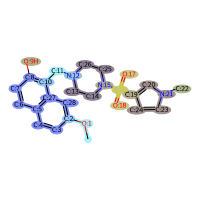

In [32]:
from IPython.display import SVG
from visualization.visualize_molecules import to_SVG
SVG(to_SVG(magnet(data[0]), add_idx=True))

In [ ]:
magnet

In [26]:
psm = frag.PSM(vocab)



TypeError: expected str, bytes or os.PathLike object, not list

In [35]:
frags = frag.FragmentRepresentation(20)

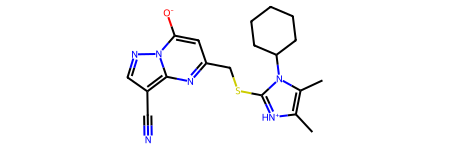

In [19]:
mol = data[3].mol
mol

In [46]:
frags(psm(data[0]))

FragmentData(x=[29, 1], edge_index=[2, 64], edge_attr=[64], y=[1], mol=<rdkit.Chem.rdchem.RWMol object at 0x7f422f0dd8b0>, substructures=[29], fragments=[14, 20], fragments_edge_index=[2, 29])

In [47]:
from torch_geometric.loader import DataLoader
loader = DataLoader([frags(psm(data[i])) for i in range(2)], batch_size=2, follow_batch = ["x", "fragments"])
batch = next(iter(loader))
batch

FragmentDataBatch(x=[55, 1], x_batch=[55], x_ptr=[3], edge_index=[2, 120], edge_attr=[120], y=[2], mol=[2], substructures=[2], fragments=[25, 20], fragments_batch=[25], fragments_ptr=[3], fragments_edge_index=[2, 55], batch=[55], ptr=[3])

In [45]:
batch.num_nodes

55

In [12]:
psm(data[3]).substructures

[[(0, 12)],
 [(9, 5)],
 [(9, 5)],
 [(1, 12)],
 [(15, 8)],
 [(12, 6)],
 [(12, 6)],
 [(13, 6)],
 [(13, 6)],
 [(14, 6)],
 [(14, 6)],
 [(15, 8)],
 [(2, 19)],
 [(3, 12)],
 [(11, 5)],
 [(4, 16)],
 [(10, 5)],
 [(10, 5)],
 [(5, 12)],
 [(6, 16)],
 [(16, 8)],
 [(16, 8)],
 [(17, 8)],
 [(17, 8)],
 [(7, 17)],
 [(11, 5)],
 [(8, 16)]]

In [23]:
psm(data[5]).substructures

[[(0, 12)],
 [(1, 12)],
 [(15, 3)],
 [(15, 3)],
 [(15, 3)],
 [(2, 16)],
 [(3, 16)],
 [(12, 1)],
 [(12, 1)],
 [(12, 1)],
 [(12, 1)],
 [(4, 16)],
 [(11, 5)],
 [(11, 5)],
 [(14, 8)],
 [(14, 8)],
 [(5, 16)],
 [(6, 16)],
 [(13, 0)],
 [(13, 0)],
 [(13, 0)],
 [(13, 0)],
 [(13, 0)],
 [(13, 0)],
 [(7, 12)],
 [(8, 14)],
 [(9, 14)],
 [(10, 14)]]

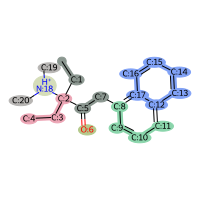

In [29]:
from IPython.display import SVG
from visualization.visualize_molecules import to_SVG
SVG(to_SVG(psm(data[4]), add_idx=True))

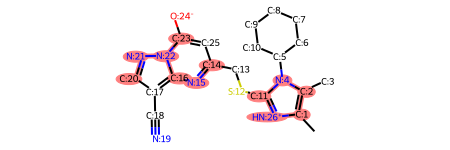

In [17]:
data[3].mol